<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Import-Dataset-&amp;-Quick-Examination" data-toc-modified-id="Import-Dataset-&amp;-Quick-Examination-1">Import Dataset &amp; Quick Examination</a></span></li><li><span><a href="#Data-Preprocessing" data-toc-modified-id="Data-Preprocessing-2">Data Preprocessing</a></span></li><li><span><a href="#Exploratory-Data-Analysis" data-toc-modified-id="Exploratory-Data-Analysis-3">Exploratory Data Analysis</a></span></li></ul></div>

**Project Goal**

The dataset tracks users who hit a company site with their demographic and user behavior characteristics. 
Our goal is to leverage machine learning:
1. to predict the conversion rate
2. to provide recommendations for the product team and marketing team to improve conversion rate and drive revenue for the company

# Import Dataset & Quick Examination

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv('conversion_data.csv')
data.head()

,country,age,new_user,source,total_pages_visited,converted
0,UK,25,1,Ads,1,0
1,US,23,1,Seo,5,0
2,US,28,1,Seo,4,0
3,China,39,1,Seo,5,0
4,US,30,1,Seo,6,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316200 entries, 0 to 316199
Data columns (total 6 columns):
country                316200 non-null object
age                    316200 non-null int64
new_user               316200 non-null int64
source                 316200 non-null object
total_pages_visited    316200 non-null int64
converted              316200 non-null int64
dtypes: int64(4), object(2)
memory usage: 14.5+ MB


In [4]:
# Examine the number of unique values and select 5 example values of each column
for col in data.columns:
    unique_vals = data[col].unique()
    print (col,len(unique_vals), unique_vals[:5])

country 4 ['UK' 'US' 'China' 'Germany']
age 60 [25 23 28 39 30]
new_user 2 [1 0]
source 3 ['Ads' 'Seo' 'Direct']
total_pages_visited 29 [1 5 4 6 2]
converted 2 [0 1]


In [5]:
# Stats of numerical data
data.describe()

,age,new_user,total_pages_visited,converted
count,316200.000000,316200.000000,316200.000000,316200.000000
mean,30.569858,0.685465,4.872966,0.032258
std,8.271802,0.464331,3.341104,0.176685
min,17.000000,0.000000,1.000000,0.000000
25%,24.000000,0.000000,2.000000,0.000000
50%,30.000000,1.000000,4.000000,0.000000
75%,36.000000,1.000000,7.000000,0.000000
max,123.000000,1.000000,29.000000,1.000000


**Notes**
1. Column:'converted' is the targeted feature with 1 referring to converted and 0 referring to non-converted. It may be better to transform its data type from integer to category.
2. Independent variables are<br>
Demographic -- country, age, new_user<br>
User Log -- total_pages_visited<br>
Channel -- source
3. There are outliers in column:'age'. The feature's max value is 123, which is unusual number compared to the average life expectancy being 72.6 years.

# Data Preprocessing

In [6]:
# Look into the age outliers
data[data['age'] > 80]

,country,age,new_user,source,total_pages_visited,converted
90928,Germany,123,0,Seo,15,1
295581,UK,111,0,Ads,10,1


**Remove Outliers**<br>
Because there are only 2 entries with unrealistic age data, I decided to remove them from the data.

In [7]:
data = data[data['age'] <= 80]

# Exploratory Data Analysis

In [8]:
sns.set_context("paper", rc={"font.size":14,"axes.titlesize":14,"axes.labelsize":12})

#### Overall Conversion Rate

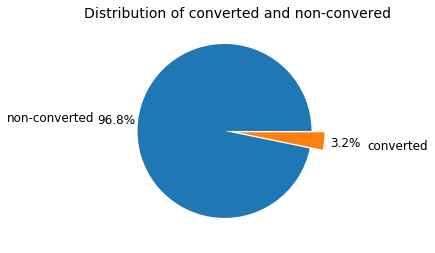

In [9]:
# Visualize overall conversion rate
fig, ax = plt.subplots()
labels = 'non-converted','converted'
explode=(0.15,0)
ax.pie(data['converted'].value_counts(), explode = explode, labels = labels,
       autopct='%1.1f%%',shadow = False, 
       pctdistance=1.25,labeldistance = 1.5, textprops={'fontsize': 12})
ax.set_title("Distribution of converted and non-convered", fontsize = 14)
plt.show()

#### User Base & Conversion Rate Per Country

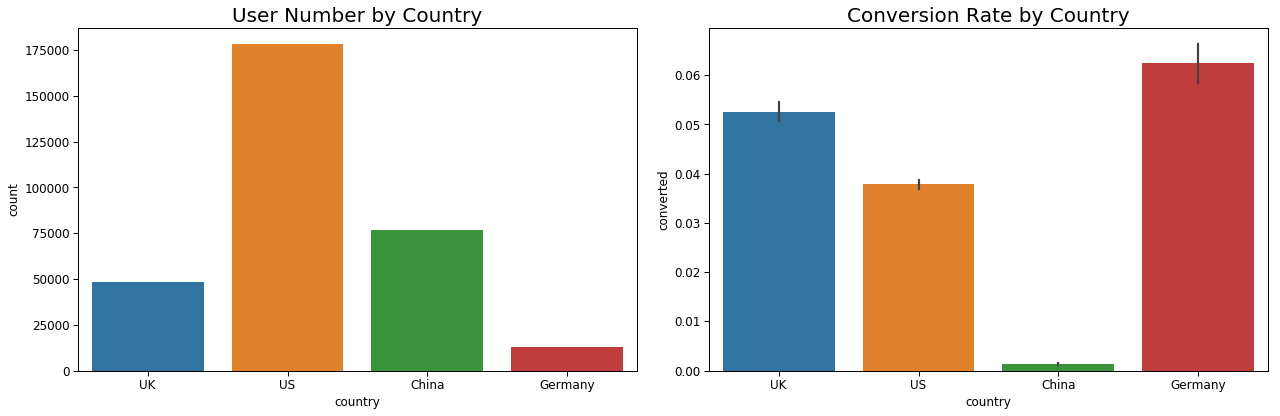

In [10]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (18, 6))
sns.countplot(x = 'country', data = data, ax = ax[0])
ax[0].set_title('User Number by Country',fontsize = 20)
ax[0].tick_params(labelsize=12)
sns.barplot(x='country', y='converted', data = data, ax = ax[1])
ax[1].set_title('Conversion Rate by Country',fontsize = 20)
ax[1].tick_params(labelsize=12)
plt.tight_layout()
plt.show()

#### Distribution of User Age

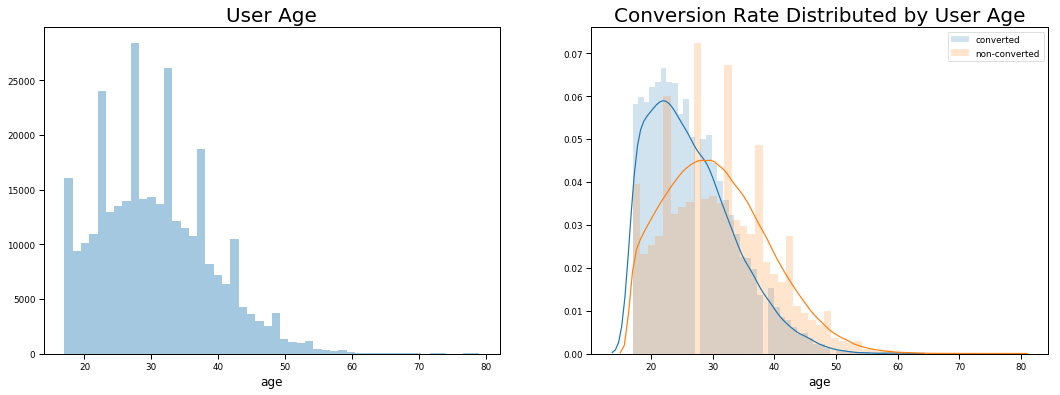

In [11]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (18, 6))
sns.distplot(data['age'], kde=False, ax = ax[0])
ax[0].set_title('User Age',fontsize = 20)
sns.distplot(data[data['converted'] == 1]['age'], ax = ax[1], label = 'converted',
            hist_kws={'alpha': 0.20})
sns.distplot(data[data['converted'] == 0]['age'], ax = ax[1], label = 'non-converted',
            hist_kws={'alpha': 0.20})
ax[1].set_title('Conversion Rate Distributed by User Age',fontsize = 20)
ax[1].legend()

**Insights on User Demographics**
- US is the current major market with the most users. China, the second largest user base, shows very low conversion rate (less than 0.01). Germany has the least users turns out to have the highest conversion rate, indicating Germany a potential market to explore.
- Majority users are within 40 years old. The conversion rate shows a declining trends when a user's age is over 30. 